# Session 3.2: Visualization 
In this part we will learn how to use python to display nice plots of your data and save them. We will use the [matplotlib](https://matplotlib.org/) package for this. This is one of the most prominent one and you will find a vast amount of examples on the official web site.

As with other packages we have to import matplotlib first. Since there are different options, how the plots can be displayed in an Jupyter Notebook, we should define the output. This is done by a so called [build-in magical commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html) which start alwais with __%__. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt      # this is the actual module for plotting
from matplotlib.pyplot import imread # we will need this to plot images
%matplotlib inline

Now we said, that we want to display our plots directly after the cell where the plot command were executed. This is a nice option for testing and writing documentations. To see other available output options for matplotlib just execute:

In [2]:
%matplotlib --list

Available matplotlib backends: ['gtk3', 'ipympl', 'inline', 'qt', 'qt4', 'osx', 'gtk', 'tk', 'pdf', 'qt5', 'svg', 'agg', 'nbagg', 'widget', 'wx', 'notebook', 'ps']


## Basic Plots

To have a quick view to your data is very straight forward with matplotlib:

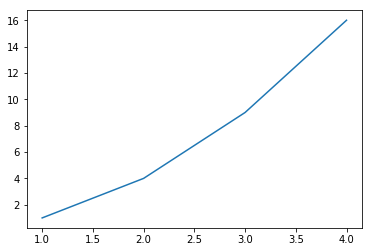

In [3]:
#@solution
xdata = [1, 2, 3, 4]
ydata = [1, 4, 9, 16]
plt.plot(xdata, ydata)

You can give a single list of values to __plot()__ and it will assume, that you want it displayed as values on the y-Axis (x values are then a running index over your data). This works of coarse with numpy arrays as well.

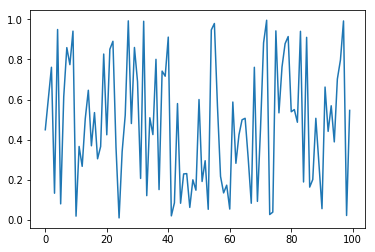

In [4]:
#@solution
ydata = np.random.random(100)
plt.plot(ydata)

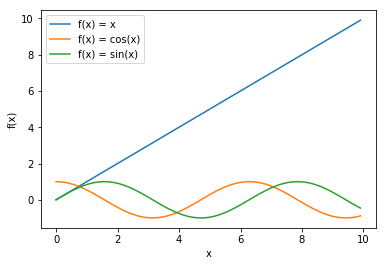

In [5]:
# a more realistic example with several functions in one plot
xdata = np.arange(0, 10, 0.1)    # array with numbers between 0 and 10
ydata1 = xdata                   # produce some dummy data from functions
ydata2 = np.cos(xdata)
ydata3 = np.sin(xdata)

plt.plot(xdata, ydata1, label="f(x) = x")
plt.plot(xdata, ydata2, label="f(x) = cos(x)")
plt.plot(xdata, ydata3, label="f(x) = sin(x)")

plt.xlabel('x')      # set x and y labels
plt.ylabel('f(x)')
plt.legend()         # activate the legend

As you have seen, that __plot()__ draws a straight line per default and selects different colors based on a predefined color list. We can change this by setting some attributes like `color`, `linestyle` and `linewidth`.

Some common line styles are: ‘solid’, ‘dashed’, ‘dashdot’, ‘dotted’ or their shortcuts:  '-', '--', '-.', ':'

You can set the color by typing the name ('blue') or the corresponding shortcut ('b') but you can use a tuple of RGB values as well (255, 0, 0). Some common colors are:

|character| 	color|
|--------|----------|
|'b' |	blue|
|'g' |	green|
|'r' |	red|
|'c' |	cyan|
|'m' |	magenta|
|'y' |	yellow|
|'k' |	black|
|'w' |	white|

<div class="alert alert-block alert-info">
Try out different markers: "x", "v", "o", "<", ">"
<br>
Can you change the color and position of lines which separate the plot?
</div>

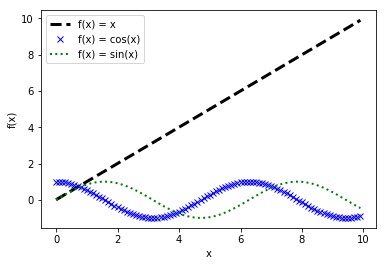

In [6]:
#@solution
xdata = np.arange(0, 10, 0.1)
ydata1 = xdata
ydata2 = np.cos(xdata)
ydata3 = np.sin(xdata)

plt.plot(xdata, ydata1, "k--",                     linewidth=3, label="f(x) = x")
plt.plot(xdata, ydata2, "bx",                      linewidth=4, label="f(x) = cos(x)")
plt.plot(xdata, ydata3, linestyle=":",  color="g", linewidth=2, label="f(x) = sin(x)")

plt.xlabel('x')      # set x and y labels
plt.ylabel('f(x)')
plt.legend() 

Besides of __plot()__ there are other functions like __scatter()__ which produces single points for each pair of data.

In [7]:
# random data for scatter plot
xdata = np.random.random(100)
ydata = np.random.random(100)

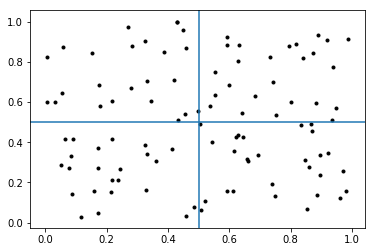

In [8]:
#@solution
plt.scatter(xdata, ydata, color="k", marker=".")
plt.axvline(0.5)  # add vertical line
plt.axhline(0.5)  # add horizontal line

In [9]:
# random data for bar plot
xdata = np.arange(10)
ydata = np.random.random(10)
yerr  = ydata * 0.2

<BarContainer object of 10 artists>

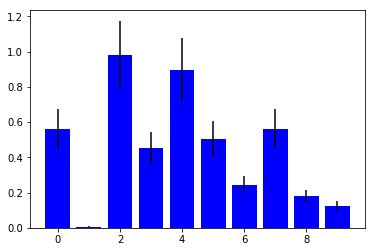

In [10]:
#@solution
plt.bar(xdata, ydata, yerr=yerr, color="b")  # bar plot with error bars

(-2, 2)

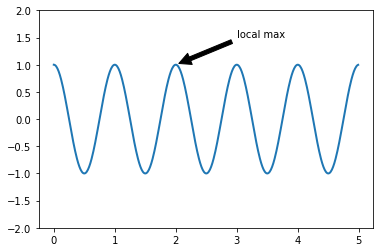

In [11]:
xdata = np.arange(0.0, 5.0, 0.01)
ydata = np.cos(2*np.pi*xdata)

plt.plot(xdata, ydata, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),         # add a text label at position x=3, y=1.5
             arrowprops=dict(facecolor='black', shrink=0.05), # and draw an arrow to x=2, y=1
             )

plt.ylim(-2, 2) # set range of y-Axis

<div class="alert alert-block alert-info">
Load the content of `sample1.dat` with `np.loadtxt`. Display this data by plotting it in an appropriate way. Add a horizontal line at 0 to illustrate the x-Axis. 
</div>

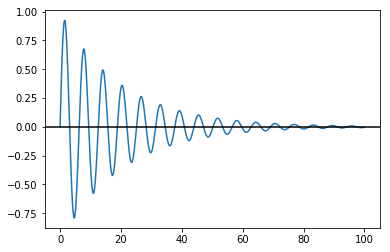

In [12]:
#@solution
sample1 = np.loadtxt("sample1.dat")

xdata = sample1[:,0]
ydata = sample1[:,1]

plt.plot(xdata, ydata)
plt.axhline(0.0, color="black")
plt.savefig("my_plot.png")

## Advanced Plotting

Until now, we used `matplotlib.pyplot` for plotting directly. For more complex plots it is good idea to work with variables. For working with `matplotlib` it helps to think of parts of your final plot as objects (see Figure). 

The most important part of the plot, for the beginning, are 
- **Figure** is the whole area of your plot, sometimes also called canvas.
- **Axes** is the actual plot. 

This separation makes sense if you thing about a figure with several subplots. In this case our **Figure** would contain several **Axes**. Be careful not to mix up ax**E**s, which describes the area where your data will be displayed, with ax**I**s, which are the x- and y-axis for example.

![A matplotlib plot](matplotlib_anatomy.png)

In [13]:
# some data to plot
xdata = np.arange(0, 10, 0.2)
ydata1 = np.sin(xdata)
ydata2 = np.cos(xdata)

Text(0.5,1,'sin(x)')

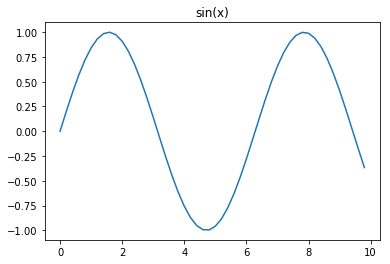

In [14]:
#@solution
fig = plt.figure()           # create an empty figure and store it in fig
ax  = fig.add_subplot(111)    # create an empty axes and add it to figure
                             # (111) means that subplot should cover the whole area of figure

ax.plot(xdata, ydata1)        # use stores axes to plot the data
ax.set_title("sin(x)")

### Subplots

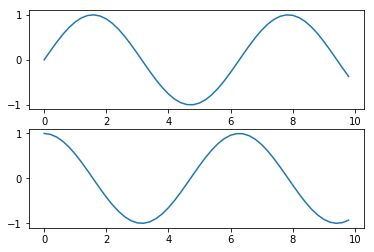

In [15]:
#@solution
fig = plt.figure()
ax1 = fig.add_subplot(211)  # (211): 2 subplots in vertical direction, 
                            #        1 subplot in horizontal direction,
                            #        1st subplot

ax2 = fig.add_subplot(212)  # (211): 2 subplots in vertical direction,
                            #        1 subplot in horizontal direction,
                            #        2nd subplot
ax1.plot(xdata, ydata1)
ax2.plot(xdata, ydata2)

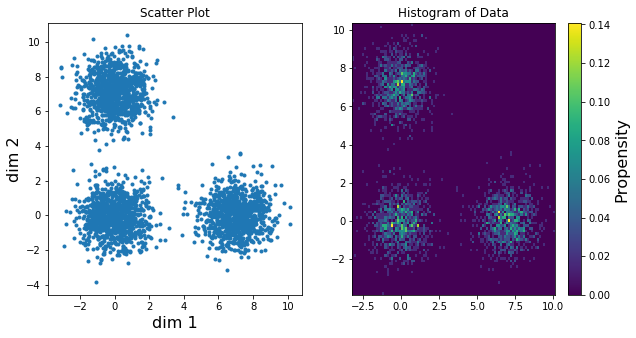

In [16]:
# load data from file: three "clouds" and plot
data = np.loadtxt('sample2.dat')
xdata = data[:,0]
ydata = data[:,1]

# prepare subplots
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot data
scatter = ax1.scatter(xdata, ydata, marker='.')
hist = ax2.hist2d(xdata, ydata, bins=100, normed=True)

cb = plt.colorbar(hist[3])
cb.set_label("Propensity", fontsize=16)

# add some titles
ax1.set_title("Scatter Plot")
ax2.set_title("Histogram of Data")

# add some labels
ax1.set_xlabel("dim 1", fontsize=16)
ax1.set_ylabel("dim 2", fontsize=16)

plt.show()

In [17]:
#@solution
fig.savefig("my_plot.png", dpi=300)

### Images

We can easily read in images using different ways:
One way would be the `matplotlib.image.imread` from `matplotlib`.

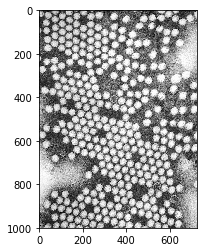

In [18]:
#@solution
image = imread("./Polio_EM_PHIL_1875_lores.png")  # source: wikipedia.com
plt.imshow(image)

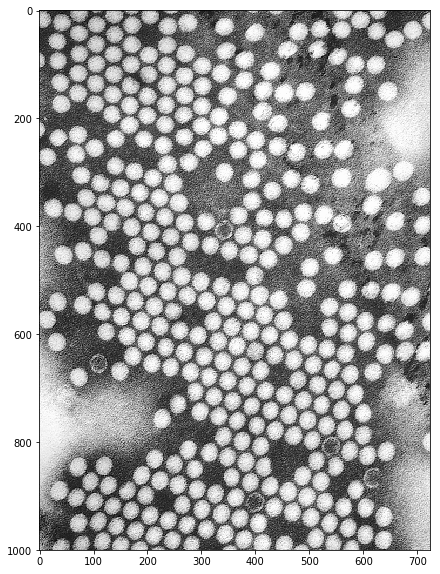

In [19]:
# plot an image
fig = plt.figure(figsize=(7,10))
ax  = fig.add_subplot(111)

ax.imshow(image)

As you can see the origin is at the top (default for images) and it seems our axis applies for the number of pixels and not for the size of the image. We want to change it so that the origin is at the bottom and the whole picture should represent a range of 72x100 (lets say nano meters) instead of 724x1000 pixels.

The first we accomplish with: `origin='bottom'`

The second with: `extent=(xmin,xmax,ymin,ymax)` => `extent=(0,72,0,100)`

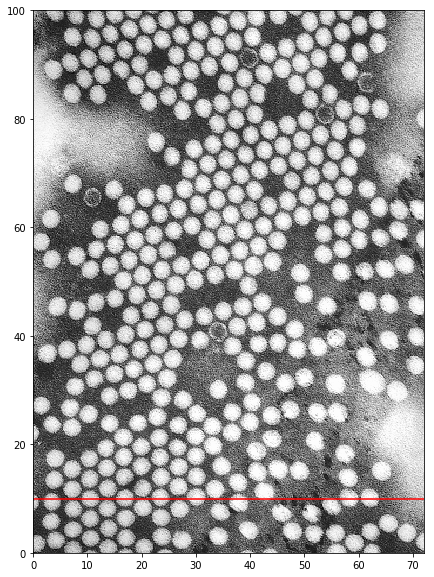

In [20]:
#@solution
fig = plt.figure(figsize=(7,10))
ax  = fig.add_subplot(111)

ax.imshow(image,                           # data
          origin='bottom',                 # position of the origin
          extent=(0,72,0,100),             # axes min&max
          ) 

ax.axhline(10,color='r')                   # draw a horizontal line

<div class="alert alert-block alert-info">
Add a for loop around `ax.axhline` so that a horizontal line is added at y=[10, 20, ... , 90]. Add a second for loop to plot a vertical line at x=[10, 20, ... , 90].
</div>

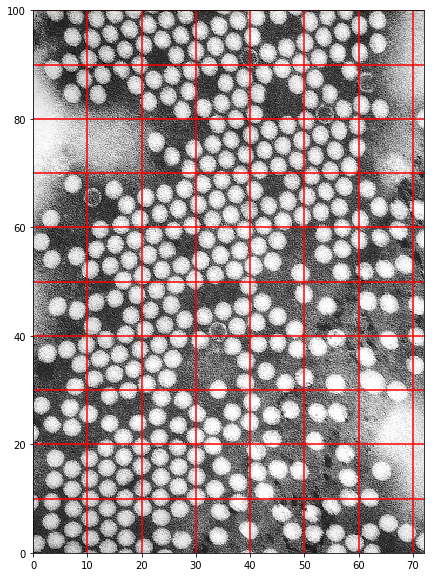

In [21]:
#@solution
fig = plt.figure(figsize=(7,10))
ax  = fig.add_subplot(111)

ax.imshow(image,                           # data
          origin='bottom',                 # position of the origin
          extent=(0,72,0,100),             # axes min&max
          ) 

for i in np.arange(10, 110, 10):
    ax.axhline(i, color='r')               # draw a horizontal line

for i in np.arange(10, 80, 10):
    ax.axvline(i, color='r')               # draw a horizontal line

### Inset

Let's say you want to show your data in form of an inlet in a picture and not as a second plot. Therefor, we first need to create our data:

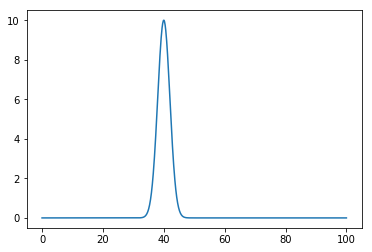

In [22]:
# generate the data
A     = 10
mu    = 40
sigma = 2
xdata = np.linspace(0,100,1000)
ydata  = A*np.exp(-(xdata-mu)**2/2/sigma**2)

plt.plot(xdata, ydata)

Now we can put things together and add this plot in the picture as an inlet. We can do this be defining an axes object at a new location inside of the plot, then plotting the data in this new axes.

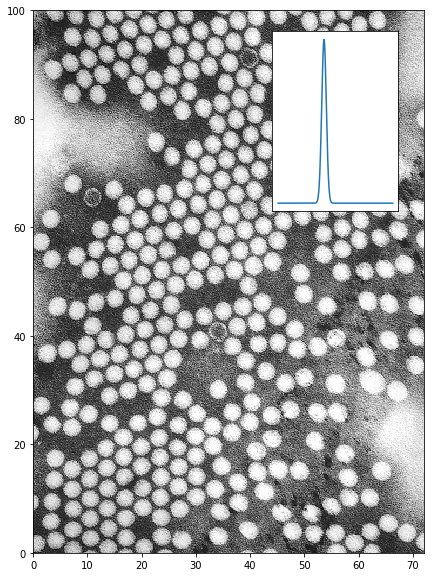

In [23]:
image = imread("./Polio_EM_PHIL_1875_lores.png")

fig = plt.figure(figsize=(7,10))
ax  = fig.add_subplot(111)

ax.imshow(image,                           # data
          origin='bottom',                 # position of the origin
          extent=(0,72,0,100),             # axes min&max
          ) 

sub_axes = plt.axes([.6, .6, .25, .25]) # location for the zoomed portion 
sub_axes.plot(xdata, ydata)             # plot the inset

# turn off the visibility of the axes (so we dont see labels)
sub_axes.axes.get_xaxis().set_visible(False) # turn of the x axis of the subplot
sub_axes.axes.get_yaxis().set_visible(False) # turn of the y axis of the subplot

# Bonus: image recognicion

For this tutorial you need an addition package.
1. Go to the anaconda-navigator and click on **Environments** on the left menu.
2. Select **all** in the dropdown menu (Default is **Installed**)
3. type **cv** in the search
4. install **opencv**

Note: You need an web connection for this.

We want to find all coins in `mario.png`, **mark** them and **count** them.


a coin looks like: `mario_coin.png`
![mario_coin](./mario_coin.png)
and the picture is: `mario.png`
![mario](./mario.png)



In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

print("Found {} coins".format(len(loc[0])))
cv2.imwrite('res.png',img_rgb)

Found 19 coins


True

Lets have a look at the resulting pictures (Look in the folders, or just load them into jupyter notebook)

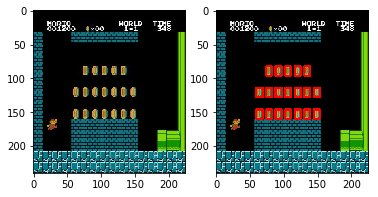

In [25]:
from PIL import Image
org = Image.open("mario.png")
rec = Image.open("res.png")
fix, axes = plt.subplots(ncols=2)
axes[0].imshow(org)
axes[1].imshow(rec)